# Posttest 5

## Muhamad Rizky Nilzamyahya 2009106029

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings

In [11]:
warnings.filterwarnings('ignore')

In [12]:
data = pd.read_csv("clean_anime.csv")

In [13]:
data.head()

,Unnamed: 0,anime_id,name,genre,type,episodes,rating,members,type_encoded,0,1,2,3,4,5
0,0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,5.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,5.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,5.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,5.0,0.0,0.0,0.0,0.0,0.0,1.0


# KNN

In [19]:
X = data[['rating','members']]
y = data[['type']]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [21]:
modelKNN = KNeighborsClassifier(n_neighbors=5)

In [22]:
modelKNN.fit(X_train, y_train) #untuk melihat model yang kita bentuk

KNeighborsClassifier()

In [23]:
print("Akurasi training set model KNN dengan jumlah neighbors=2 : ", round(modelKNN.score(X_train, y_train),2))
print("Akurasi test set model KNN dengan jumlah neighbors=2 : ", round(modelKNN.score(X_test, y_test),2))

Akurasi training set model KNN dengan jumlah neighbors=2 :  0.53
Akurasi test set model KNN dengan jumlah neighbors=2 :  0.34


# Naive Bayes

In [24]:
from sklearn.naive_bayes import GaussianNB

In [25]:
gs = GaussianNB()

In [26]:
gs.fit(X_train, y_train)

GaussianNB()

In [27]:
print("Akurasi training set model Naive Bayes  : ", round(gs.score(X_train, y_train),2))
print("Akurasi test set model Naive Bayes : ", round(gs.score(X_test, y_test),2)) #round itu di bulatkan

Akurasi training set model Naive Bayes  :  0.34
Akurasi test set model Naive Bayes :  0.34


# Confusion Matrix

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [32]:
X = data[['rating','members']]
y = data[['type']]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [35]:
modelKNN = KNeighborsClassifier(n_neighbors=5)

In [36]:
modelKNN.fit(X_train, y_train) #untuk melihat model yang kita bentuk

KNeighborsClassifier()

In [37]:
y_pred = modelKNN.predict(X_test)

In [38]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[206,  22,  17, 147,  38, 136],
       [ 43,  12,   4,  33,   8,  15],
       [ 60,  10,   6,  57,  20,  22],
       [207,  15,  11, 360,  80, 154],
       [101,   8,   8, 152,  51, 103],
       [217,  13,  10, 246,  80, 402]], dtype=int64)

In [39]:
confusion_matrix(y_test, y_pred)

array([[206,  22,  17, 147,  38, 136],
       [ 43,  12,   4,  33,   8,  15],
       [ 60,  10,   6,  57,  20,  22],
       [207,  15,  11, 360,  80, 154],
       [101,   8,   8, 152,  51, 103],
       [217,  13,  10, 246,  80, 402]], dtype=int64)

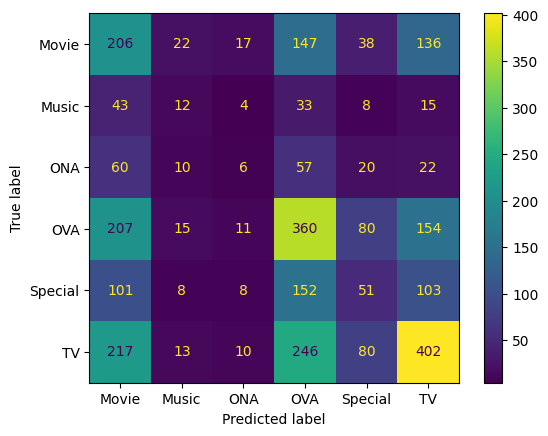

In [40]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelKNN.classes_)
disp.plot()

## Membandingkan Accuracy  dari KNN  dan Naive Bayes

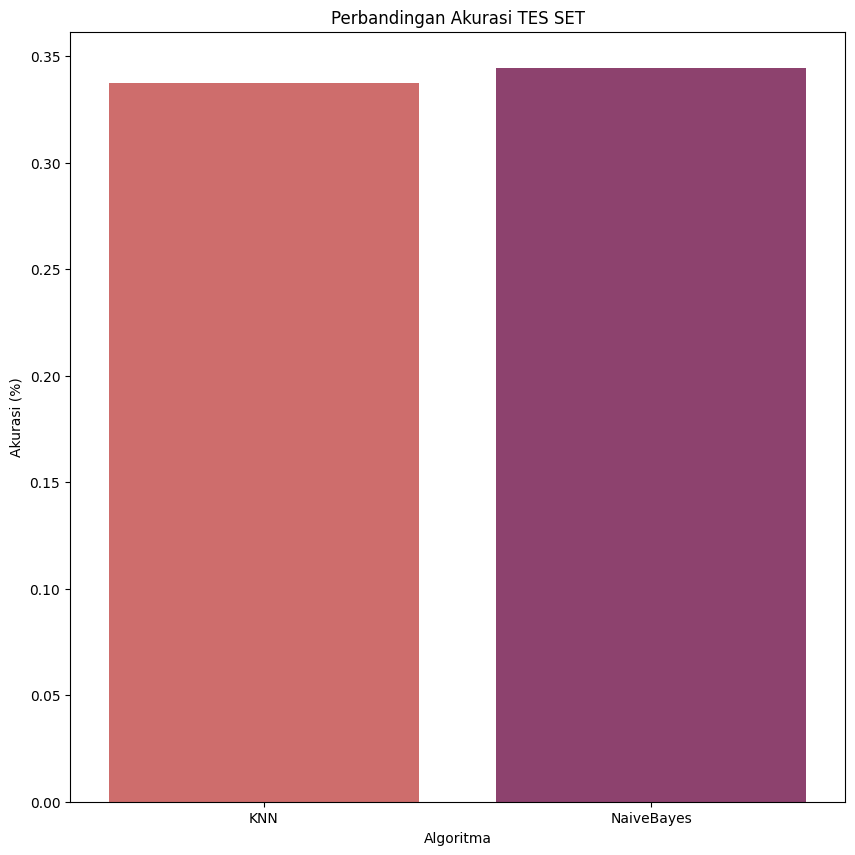

In [41]:
#tes set
algoritma = ["KNN","NaiveBayes"]
akurasi = [modelKNN.score(X_test, y_test),gs.score(X_train, y_train)]

plt.figure(figsize=(10,10))

sns.barplot(x= algoritma,y = akurasi,palette='flare')

plt.title("Perbandingan Akurasi TES SET")
plt.ylabel("Akurasi (%)")
plt.xlabel("Algoritma")
plt.show()

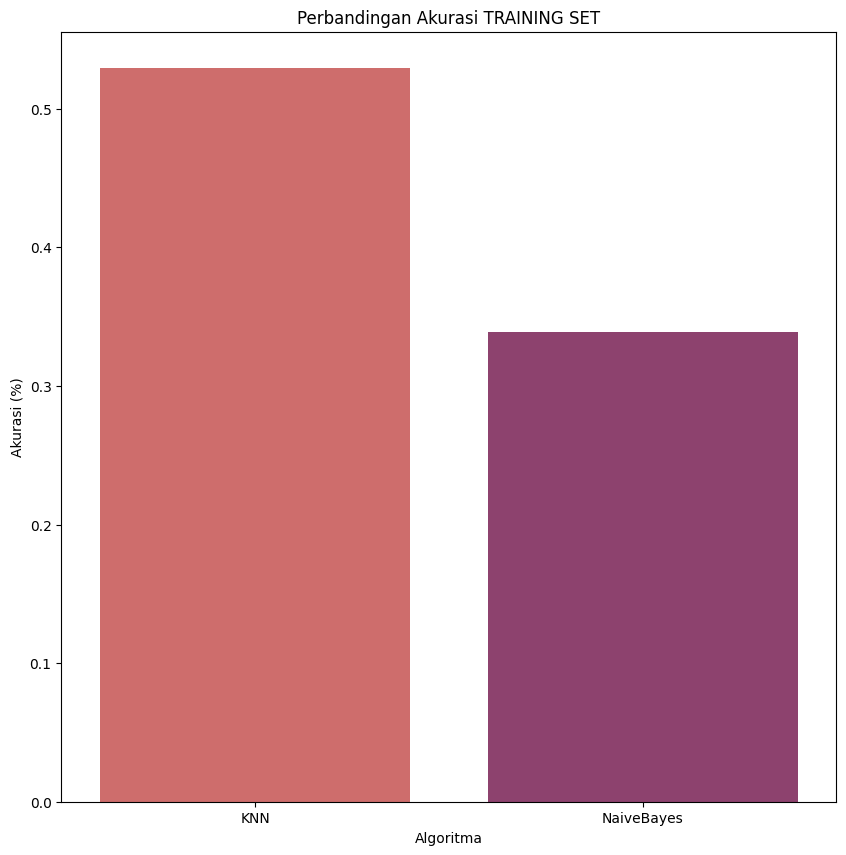

In [42]:
#training set
algoritma = ["KNN","NaiveBayes"]
akurasi = [modelKNN.score(X_train, y_train),gs.score(X_test, y_test)]

plt.figure(figsize=(10,10))

sns.barplot(x= algoritma,y = akurasi,palette='flare')

plt.title("Perbandingan Akurasi TRAINING SET")
plt.ylabel("Akurasi (%)")
plt.xlabel("Algoritma")
plt.show()